# California Housing Prices

- Context
    - This is the dataset used in the second chapter of Aurélien Géron's recent book 'Hands-On Machine learning with Scikit-Learn and TensorFlow'. It serves as an excellent introduction to implementing machine learning algorithms because it requires rudimentary data cleaning, has an easily understandable list of variables and sits at an optimal size between being to toyish and too cumbersome.

    - The data contains information from the 1990 California census. So although it may not help you with predicting current housing prices like the Zillow Zestimate dataset, it does provide an accessible introductory dataset for teaching people about the basics of machine learning.

- About this Dataset
1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
10. oceanProximity: Location of the house w.r.t ocean/sea

### TASK:
1. Preprocess the data
2. Implement Neural Network to predict values

### Import relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
raw_df = pd.read_csv("Housing.csv")
raw_df.describe(include = 'all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


### Handling missing values

1. Create a function what will give description of columns with missing values
2. On the basis of percentage of missing values we will deal with them

In [3]:
def null_summary(df):
    total = df.shape[0] # no. of rows
    missing_info = df.isnull().sum() / total * 100
    # return a series that contains the count for missing values for each column
    # percentage is calculated and stored instead of count due to "/total*100"
    missing_info = missing_info[missing_info > 0]
    # select the column containing missing values
    
    for col, per in missing_info.items():
        print(f"{col} : {int(df[col].isnull().sum())} ({per:.3f}%)")
    return missing_info

null_info = null_summary(raw_df)
# column_name : no_of_null (percent_of_null_values)

total_bedrooms : 207 (1.003%)


Null values of about 1 %, so we decide to delete those records

In [4]:
df = raw_df.dropna()
df.describe(include = 'all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9034
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155,NaN
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,NaN
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,NaN


### Presence of any non significant column

In [5]:
columns = [df.columns[i] for i in range(2,8)]
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
x = df[columns]
y= df['median_house_value']

f_regression(x,y)
reg = LinearRegression()
reg.fit(x,y)
p_values = f_regression(x,y)[1]

reg_summary = pd.DataFrame(data = x.columns.values, columns=['Features'])
reg_summary ['Coefficients'] = reg.coef_
reg_summary ['p-values'] = p_values.round(3)
reg_summary

,Features,Coefficients,p-values
0,housing_median_age,1882.121429,0.0
1,total_rooms,-19.733115,0.0
2,total_bedrooms,100.943796,0.0
3,population,-35.319022,0.0
4,households,124.803173,0.0
5,median_income,47748.380835,0.0


All are significant columns

### Visualization

Now we check for graphs of column iteratively, so get any insight

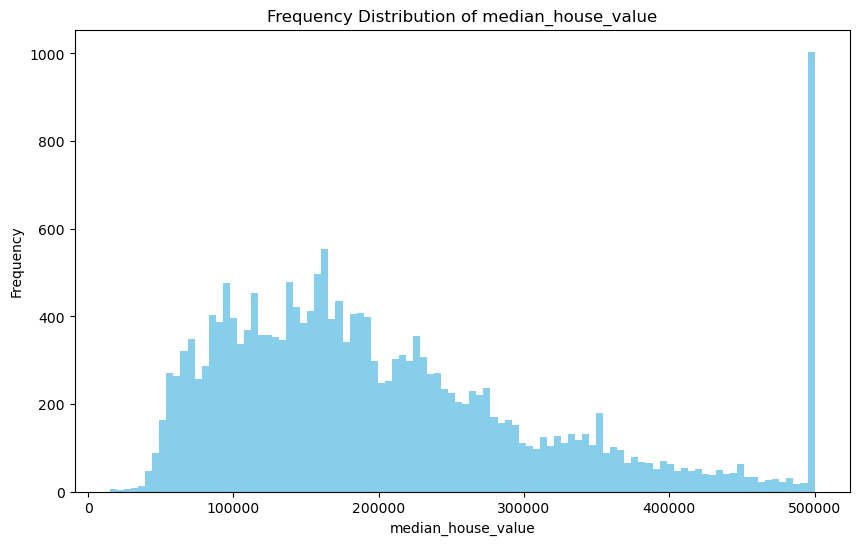

In [6]:
# Create a bar plot for the frequency distribution
plt.figure(figsize=(10, 6))  # You can adjust the figure size
plt.hist(df['median_house_value'], bins=100, color='skyblue')
plt.title('Frequency Distribution of ' + 'median_house_value')
plt.xlabel('median_house_value')
plt.ylabel('Frequency')

plt.show()

In [7]:
custom_percentiles = [90,94,95,97,98,99] 

# Calculate the custom percentiles for the 'median_house_value' column
percentiles_values = np.percentile(df['median_house_value'], custom_percentiles)

In [8]:
percentiles_values
# So we remove all the records where median_house_value > 490560

array([376680., 452600., 490560., 500001., 500001., 500001.])

In [9]:
df = df[df['median_house_value'] <= percentiles_values[2]]

After checking for all the graphs, all are within accepted region

### Standardization 

In [10]:
from sklearn import preprocessing

# Specify the column names you want to exclude
columns_to_exclude = ['ocean_proximity']
# Get the remaining column names
columns_to_normalize = list(set(df.columns) - set(columns_to_exclude))

scaler= preprocessing.StandardScaler()
df.loc[:, columns_to_normalize] = scaler.fit_transform(df.loc[:, columns_to_normalize])
df.describe(include = 'all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,1.941100e+04,1.941100e+04,1.941100e+04,19411.000000,1.941100e+04,1.941100e+04,1.941100e+04,1.941100e+04,1.941100e+04,19411
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8473
mean,-1.733620e-15,-4.498042e-15,-1.171365e-16,0.000000,-1.332428e-16,8.785238e-18,-2.928413e-17,2.342730e-17,-1.171365e-16,NaN
std,1.000026e+00,1.000026e+00,1.000026e+00,1.000026,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,NaN
min,-2.386379e+00,-1.447922e+00,-2.186867e+00,-1.198054,-1.272924e+00,-1.256286e+00,-1.302780e+00,-2.027692e+00,-1.832582e+00,NaN
25%,-1.095100e+00,-8.016876e-01,-8.279249e-01,-0.540113,-5.745395e-01,-5.628134e-01,-5.719485e-01,-7.333410e-01,-7.804348e-01,NaN
50%,5.252309e-01,-6.436157e-01,-2.854715e-02,-0.233562,-2.431030e-01,-2.283044e-01,-2.352443e-01,-1.436334e-01,-1.873742e-01,NaN
75%,7.844839e-01,9.649975e-01,6.908928e-01,0.228094,2.564192e-01,2.651620e-01,2.737274e-01,5.790421e-01,5.791384e-01,NaN


### Dealing with categorical data

In [11]:
unique_values = df['ocean_proximity'].unique()
unique_values

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [12]:
df = pd.get_dummies(df , columns = ['ocean_proximity'], drop_first = True)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.329425,1.034735,1.010644,-0.796335,-0.972263,-0.977674,-0.979126,2.975982,2.712495,False,False,True,False
1,-1.324439,1.025437,-0.588112,2.049098,1.340690,0.838107,1.662306,2.960764,1.735139,False,False,True,False
2,-1.334410,1.020788,1.889959,-0.527760,-0.827852,-0.825704,-0.846010,2.293206,1.668666,False,False,True,False
3,-1.339396,1.020788,1.889959,-0.616065,-0.721319,-0.771554,-0.736386,1.260986,1.556494,False,False,True,False
4,-1.339396,1.020788,1.889959,-0.454554,-0.614785,-0.765440,-0.631981,0.112008,1.565842,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.761063,1.778602,-0.268360,-0.437167,-0.392249,-0.520891,-0.446663,-1.349649,-1.177193,True,False,False,False
20636,-0.820890,1.783252,-0.827925,-0.880065,-0.922548,-0.947979,-1.010447,-0.712464,-1.187580,True,False,False,False
20637,-0.825876,1.755357,-0.907863,-0.167677,-0.129468,-0.379401,-0.177822,-1.260321,-1.029707,True,False,False,False
20638,-0.875732,1.755357,-0.827925,-0.347947,-0.309390,-0.611723,-0.397071,-1.153410,-1.108643,True,False,False,False


In [13]:
df.corr()["median_house_value"].sort_values(ascending = False)

median_house_value            1.000000
median_income                 0.645062
ocean_proximity_NEAR BAY      0.156528
total_rooms                   0.144711
ocean_proximity_NEAR OCEAN    0.132735
households                    0.095903
total_bedrooms                0.076345
housing_median_age            0.064531
ocean_proximity_ISLAND        0.031509
population                    0.014436
longitude                    -0.045727
latitude                     -0.149815
ocean_proximity_INLAND       -0.500504
Name: median_house_value, dtype: float64

### Split the data 

In [14]:
inputs = df.drop('median_house_value', axis = 1).to_numpy()
outputs = df['median_house_value'].to_numpy()
from sklearn.model_selection import train_test_split

train_inputs, test_inputs, train_targets, test_targets = train_test_split(inputs,outputs,random_state =42)

### Save the Data 

In [15]:
np.savez('housing_training_data', inputs = train_inputs, targets = train_targets)
np.savez('housing_test_data', inputs = test_inputs, targets = test_targets)